<a href="https://colab.research.google.com/github/peta-byte/colab/blob/master/Chapter_11_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [132]:
# Question 2

# Data
x_verbal = np.array([81,68,57,100,54,82,75,58,55,49,64,66,80,100,83,64,83,93,74,51,79,81,50,72,54,65,56,98,97,77,49,39,87,70,57,74,87,90,81,84])  # Verbal entrance test scores in percentile
x_math = np.array([87,99,86,49,83,86,74,98,54,81,76,59,61,85,76,66,72,54,59,75,75,62,69,70,52,79,78,67,80,90,54,81,69,95,89,67,93,65,76,69])  # Mathematics entrance test scores in percentile
x_verbal_math = np.array([x_verbal, x_math]).T
y_gpa = np.array([3.49,2.89,2.73,1.54,2.56,3.43,3.59,2.86,1.46,2.11,2.69,2.16,2.60,3.30,3.75,2.70,3.15,2.28,2.92,2.48,3.45,2.76,1.90,3.01,1.48,2.98,2.58,2.73,3.27,3.47,1.30,1.22,3.23,3.82,2.93,2.83,3.84,3.01,3.33,3.06]) # GPA of college freshmen

print(x_verbal.shape, x_math.shape, y_gpa.shape)

(40,) (40,) (40,)


In [133]:
# Develop a model to predict the college GPA of matriculating freshmen based on Verbal and Mathematics entrance test scores.

# Add a constant for intercept
x_verbal_math_with_constant = sm.add_constant(x_verbal_math)

# Fit regression model
model_gpa = sm.OLS(y_gpa, x_verbal_math_with_constant)

# Predictions
y_gpa_pred = model_gpa.fit()

In [134]:
# What proportion of variablity in the college GPA is accounted for by verbal and mathematics test scores?

# Compute R^2
r2 = y_gpa_pred.rsquared

print(f"R-squared (R²): {r2:.4f}")

# R^2 value is 0.6811 suggesting a linear relationship and about 68% of variation in GPA is explained by Verbal and Mathematics test scores.

R-squared (R²): 0.6811


In [135]:
# Question 4

# Data
x_alkali = np.array([2.5,19.6,5.2,71.4,26.4,4.8,6.6,16.5,7.1,83.7,108.5,6.4,7.5,17.3,7.0,10.5,30.0,55.4,6.3,67.0,28.8,119.1,25.4,106.5,8.5,87.6,114.0,97.5,11.8,66.5,16.0,5.0,25.6,1.2,34.0,15.5,17.3,71.8]) # alkalinity in mg/l
x_calcium = np.array([2.9,4.5,2.8,55.2,9.2,4.6,2.7,13.8,5.2,66.5,35.6,4.0,2.0,10.7,6.3,6.3,13.9,15.9,3.3,58.6,10.2,38.4,8.8,90.7,2.5,85.5,72.6,45.5,24.2,26.0,41.2,23.6,12.6,2.1,13.1,5.2,3.0,20.5]) # calcium in mg/l
x_ph = np.array([4.6,7.3,5.4,8.1,5.8,6.4,5.4,7.2,5.8,8.2,8.7,5.8,4.4,6.7,6.9,5.5,6.9,7.3,5.8,7.8,7.4,7.9,7.1,6.8,7.0,7.5,7.0,6.8,5.9,8.3,6.7,6.2,6.2,4.3,7.0,6.9,5.2,7.9]) # pH
y_mercury = np.array([1330,250,450,160,720,810,710,510,1000,150,190,1020,450,590,810,420,530,310,470,250,410,160,160,230,560,890,180,190,440,160,670,550,580,980,310,430,280,250]) # Mercury concentration in 3yr old fish in ppm

print(x_alkali.shape, x_calcium.shape, x_ph.shape, y_mercury.shape)

(38,) (38,) (38,) (38,)


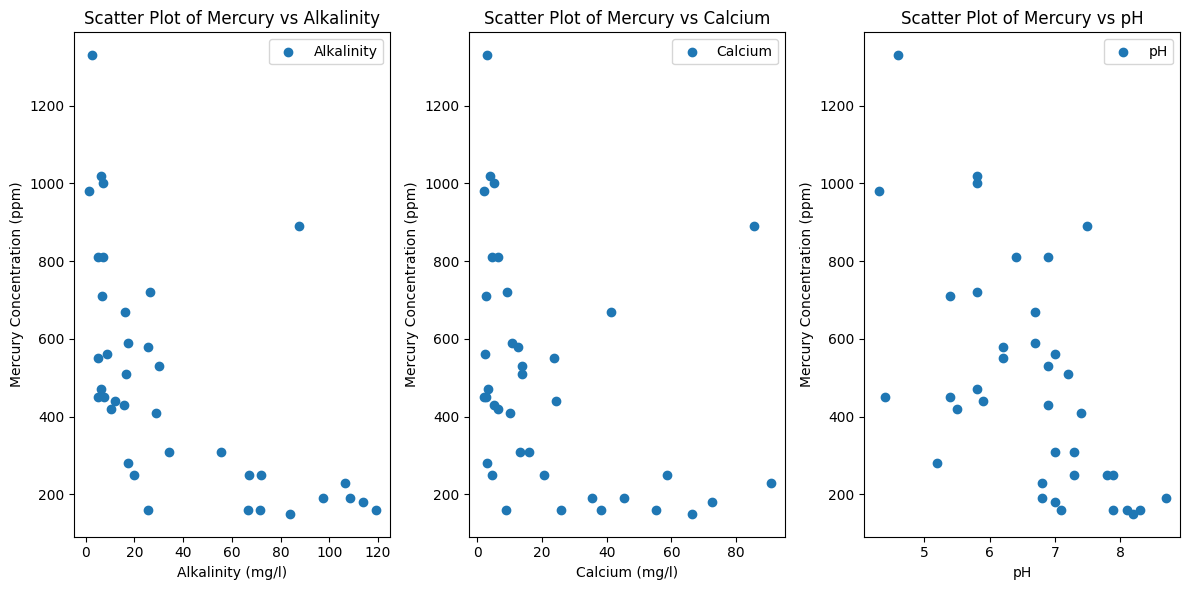

In [136]:
# a) Make scatter plots of the mercury level vs alkali, calcium, and ph.

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.scatter(x_alkali, y_mercury, label="Alkalinity")
plt.xlabel("Alkalinity (mg/l)")
plt.ylabel("Mercury Concentration (ppm)")
plt.title("Scatter Plot of Mercury vs Alkalinity")
plt.legend()

plt.subplot(1,3,2)
plt.scatter(x_calcium, y_mercury, label="Calcium")
plt.xlabel("Calcium (mg/l)")
plt.ylabel("Mercury Concentration (ppm)")
plt.title("Scatter Plot of Mercury vs Calcium")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(x_ph, y_mercury, label="pH")
plt.xlabel("pH")
plt.ylabel("Mercury Concentration (ppm)")
plt.title("Scatter Plot of Mercury vs pH")
plt.legend()

plt.tight_layout()
plt.show()

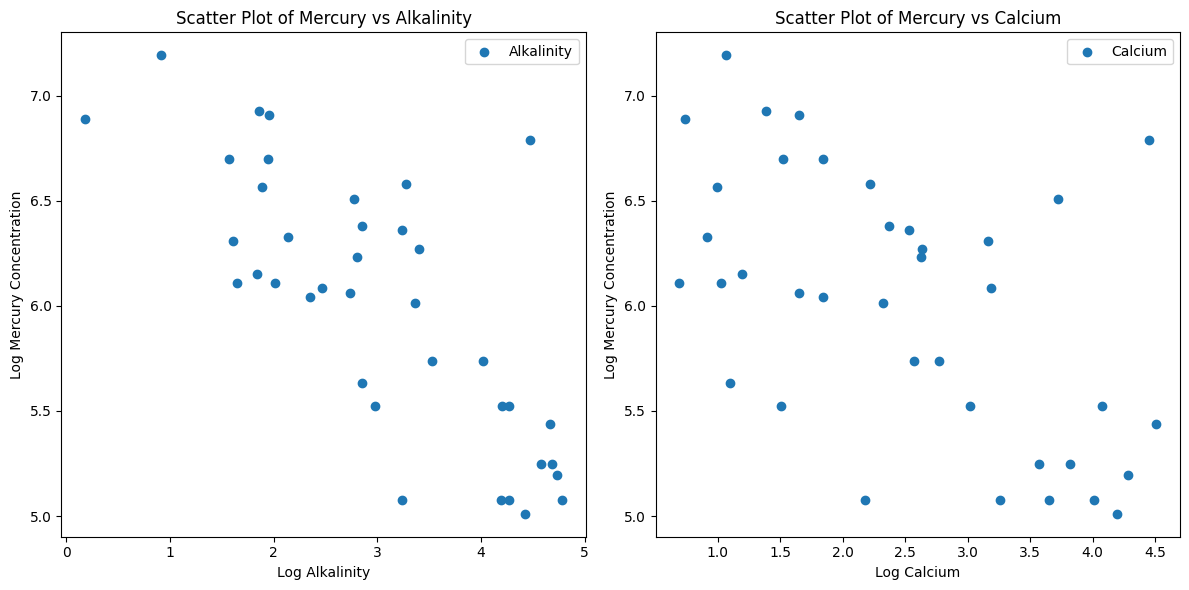

In [137]:
# Do the scatter plots of log mercury vs log alkali, and log mercury vs calcium indicate linear relationships?
y_mercury_log = np.log(y_mercury)
x_alkali_log = np.log(x_alkali)
x_calcium_log = np.log(x_calcium)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(x_alkali_log, y_mercury_log, label="Alkalinity")
plt.xlabel("Log Alkalinity")
plt.ylabel("Log Mercury Concentration")
plt.title("Scatter Plot of Mercury vs Alkalinity")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x_calcium_log, y_mercury_log, label="Calcium")
plt.xlabel("Log Calcium")
plt.ylabel("Log Mercury Concentration")
plt.title("Scatter Plot of Mercury vs Calcium")
plt.legend()

plt.tight_layout()
plt.show()

# These scatters plots indicate that there are linear relationships between Mercury concentration and Alkalinity and between Mercury concentration and Calcium.

In [138]:
# b) Fit a regression model to the transformed data. What variability in Mercury concentration is explained by this model?

x_alkali_calcium_ph = np.array([x_alkali_log, x_calcium_log, x_ph]).T

x_alkali_calcium_ph_with_constant = sm.add_constant(x_alkali_calcium_ph)

model_mercury = sm.OLS(y_mercury_log, x_alkali_calcium_ph_with_constant)

y_mercury_pred = model_mercury.fit()

r2 = y_mercury_pred.rsquared

print(f"R-squared (R²): {r2:.4f}")

# R^2 value is 0.6069 suggesting a linear relationship and about 61% of variation in Mercury is explained by Alkali, Calcium and pH.

R-squared (R²): 0.6069


In [139]:
# Question 22

# Data

x_gravity = np.array([0.499,0.558,0.604,0.441,0.550,0.528,0.418,0.480,0.406,0.467]) # Specific Gravity
x_moisture = np.array([11.1,8.9,8.8,8.9,8.8,9.9,10.7,10.5,10.5,10.7]) # Moisture Content
y_strength = np.array([11.14,12.74,13.13,11.51,12.38,12.60,11.13,11.70,11.02,11.41]) # Strength of Wood Beams

print(x_gravity.shape, x_moisture.shape, y_strength.shape)

(10,) (10,) (10,)


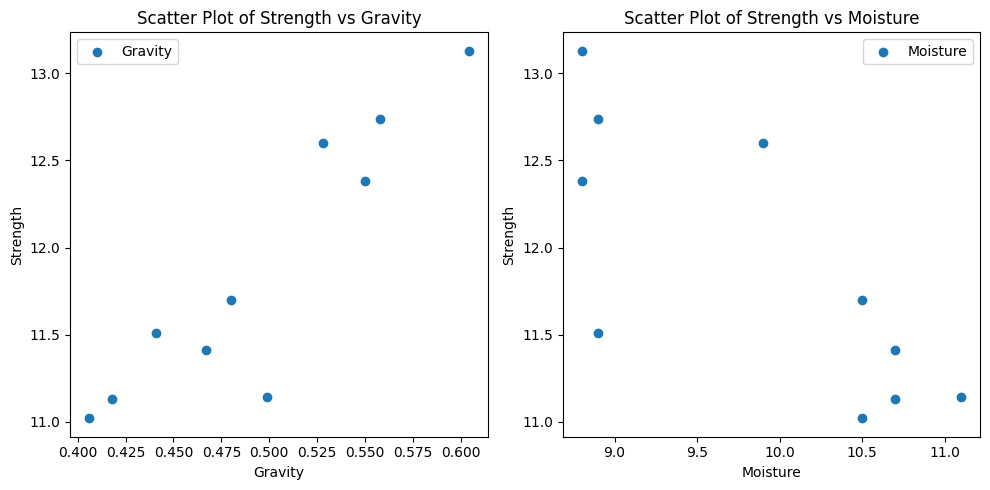

In [140]:
# Make a scatter plot of the 2 predictors. Which observation seems to be influential?

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x_gravity, y_strength, label="Gravity")
plt.xlabel("Gravity")
plt.ylabel("Strength")
plt.title("Scatter Plot of Strength vs Gravity")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x_moisture, y_strength, label="Moisture")
plt.xlabel("Moisture")
plt.ylabel("Strength")
plt.title("Scatter Plot of Strength vs Moisture")
plt.legend()

plt.tight_layout()
plt.show()


# In the Scatter plot of Strength vs Gravity, point (0.499, 11.14) - observation 1 - appears to be influential
# In the Scatter plot of Strength vs Moisture, point (8.9, 11.51) - observation 4 - appears to be influential

In [141]:
# b) Calculate the hat matrix for the data. Check if the points identified in (a) are truly influential.

x_gravity_moisture = np.array([x_gravity, x_moisture]).T

x_gravity_moisture_with_constant = sm.add_constant(x_gravity_moisture)

model_strength = sm.OLS(y_strength, x_gravity_moisture_with_constant).fit()

y_strength_pred = model_strength.predict(x_gravity_moisture_with_constant)

influence = model_strength.get_influence()

hat_matrix_diag = influence.hat_matrix_diag

for i, leverage in enumerate(hat_matrix_diag):
  print(f"Observation {i}: Leverage = {leverage: .4f}")

for i, leverage in enumerate(hat_matrix_diag):
  if leverage > 2 * (x_gravity_moisture_with_constant.shape[1]/len(y_strength)): # => 2 (k + 1)/n => (2 * (2 + 1)) / 10
    print(f"Observation {i} has high leverage = {leverage: .4f}")


# Observation 1 and 4 do not have high leverage thus they are not influential

Observation 0: Leverage =  0.4179
Observation 1: Leverage =  0.2419
Observation 2: Leverage =  0.4173
Observation 3: Leverage =  0.6044
Observation 4: Leverage =  0.2522
Observation 5: Leverage =  0.1479
Observation 6: Leverage =  0.2616
Observation 7: Leverage =  0.1540
Observation 8: Leverage =  0.3155
Observation 9: Leverage =  0.1873
Observation 3 has high leverage =  0.6044


In [142]:
# c) Fit the model based on all data before and after omitting the influential observation. Does it change much?

x_gravity_removed_obs = np.delete(x_gravity, 3, axis=0)
x_moisture_removed_obs = np.delete(x_moisture, 3, axis=0)
x_removed_obs = np.array([x_gravity_removed_obs, x_moisture_removed_obs]).T
y_strength_removed_obs = np.delete(y_strength, 3, axis=0)
x_removed_obs_with_constant = sm.add_constant(x_removed_obs)
model_strength_removed_obs = sm.OLS(y_strength_removed_obs, x_removed_obs_with_constant).fit()
y_strength_pred_removed_obs = model_strength_removed_obs.predict(x_removed_obs_with_constant)

print("r2 with all data:")
print(f"R-squared: {model_strength.rsquared:.4f}")

print("\nr2 without influential observation:")
print(f"R-squared: {model_strength_removed_obs.rsquared:.4f}")

# There is a slight increase in the coefficient of determination which signifies an improvement in the goodness of fit without the influential observation.
# I would use the model without the influential observation to predict wood beam strength.

r2 with all data:
R-squared: 0.9000

r2 without influential observation:
R-squared: 0.9108


In [143]:
# Question 24

# Data

x_year = np.array([1980,1985,1987,1988,1989,1990,1991,1992,1993,1994,1995])
y_w_scores = np.array([443,452,453,455,454,455,453,456,457,460,463]) # Average women"s SAT Math scores

print(x_year.shape, y_w_scores.shape)

(11,) (11,)


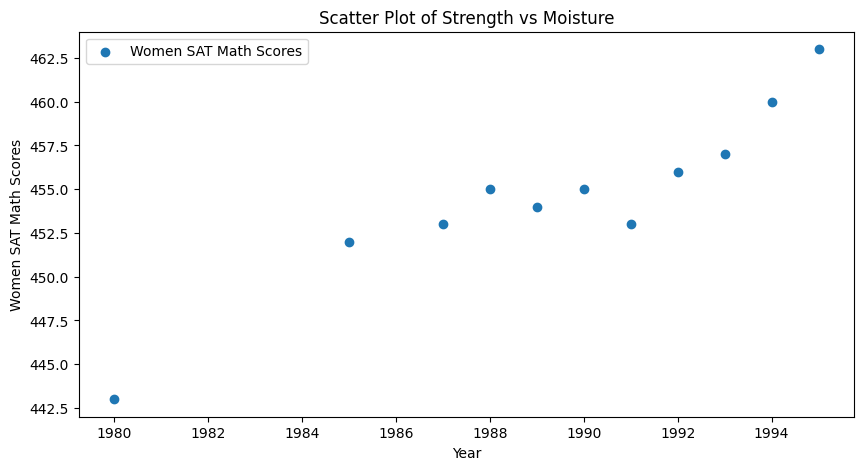

In [144]:
# a) Plot women"s scores by year. What trend is evident from the graph.

plt.figure(figsize=(10,5))

plt.scatter(x_year, y_w_scores, label="Women SAT Math Scores")
plt.xlabel("Year")
plt.ylabel("Women SAT Math Scores")
plt.title("Scatter Plot of Strength vs Moisture")
plt.legend()
plt.show()

# There seems to be a linear relationship between the women"s SAT scores and years.

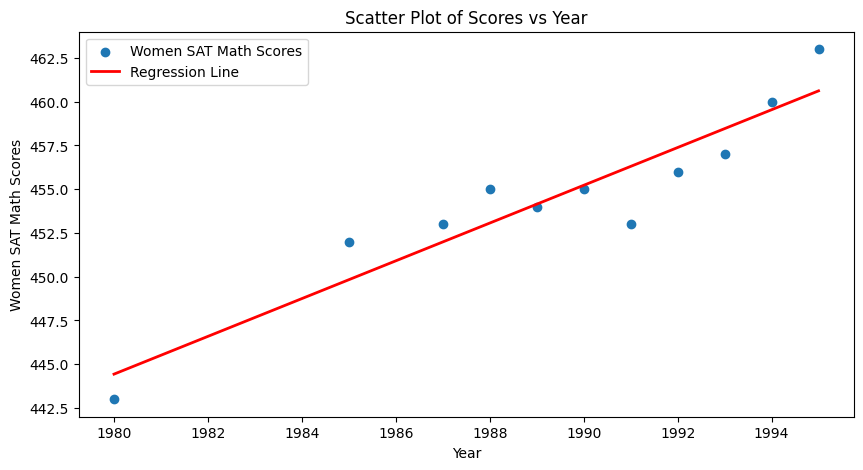

In [145]:
# b) Fit a straight line for score vs year

x_year_with_constant = sm.add_constant(x_year)

model_w_scores = sm.OLS(y_w_scores, x_year_with_constant).fit()

y_w_scores_pred = model_w_scores.predict(x_year_with_constant)


plt.figure(figsize=(10,5))

plt.scatter(x_year, y_w_scores, label="Women SAT Math Scores")
plt.plot(x_year, y_w_scores_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Women SAT Math Scores")
plt.title("Scatter Plot of Scores vs Year")
plt.legend()
plt.show()

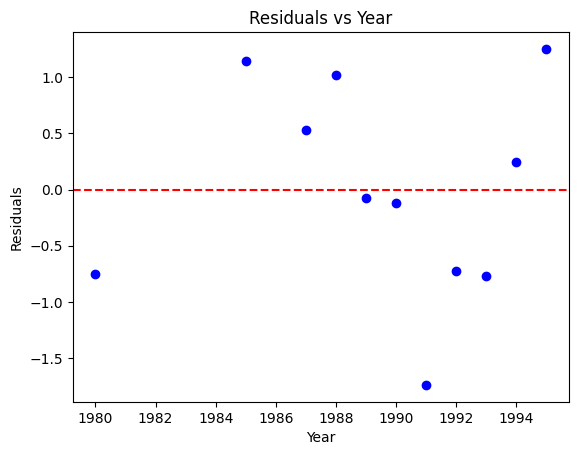

In [146]:
# c) Plot residuals against year. Are there any evident outliers or patterns?

residuals = model_w_scores.resid_pearson
plt.scatter(x_year, residuals, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.title("Residuals vs Year")
plt.show()

# Some residuals are greater than 2 and -2. They might be outliers.

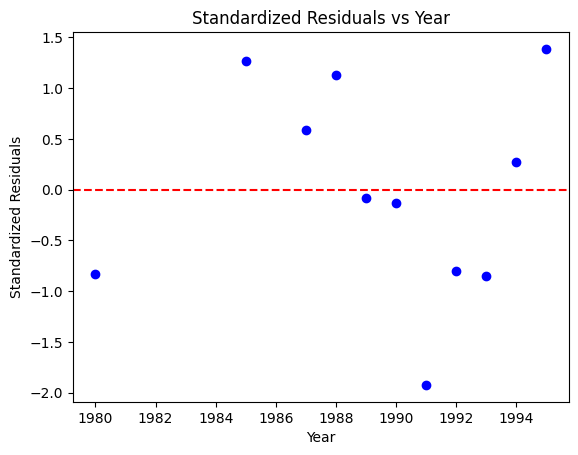

In [147]:
# d) Obtain standardized residuals. Do they indicate any outliers?

standardized_residuals = np.vectorize(lambda x: x/np.std(residuals))(residuals)
plt.scatter(x_year, standardized_residuals, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs Year")
plt.show()

# There are no residuals greater than 2 or -2.

In [148]:
outliers = np.where((standardized_residuals > 2) | (standardized_residuals < -2))
print(f"Outliers: {outliers[0]}, Standardized residuals: {standardized_residuals[outliers]}")

Outliers: [], Standardized residuals: []


In [149]:
# Question 28

# Data
x_age = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
y_cost = np.array([4330,4590,4870,5510,5850,6200,6550,6950,6950,7360,7570,8020,8500,10360,10980,11640,13950,14780])

print(x_age.shape, y_cost.shape)

(18,) (18,)


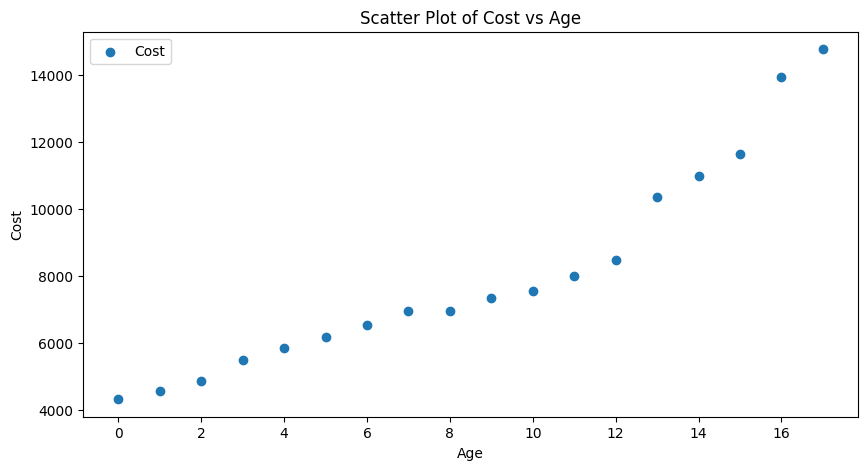

In [150]:
# a) Plot cost vs age. Is this graph best described by a straight line or a curve?
import matplotlib.ticker as ticker

ax = plt.figure(figsize=(10,5)).gca()

plt.scatter(x_age, y_cost, label="Cost")
plt.xlabel("Age")
plt.ylabel("Cost")
plt.title("Scatter Plot of Cost vs Age")
plt.legend()

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


# This graph is best described by a curve

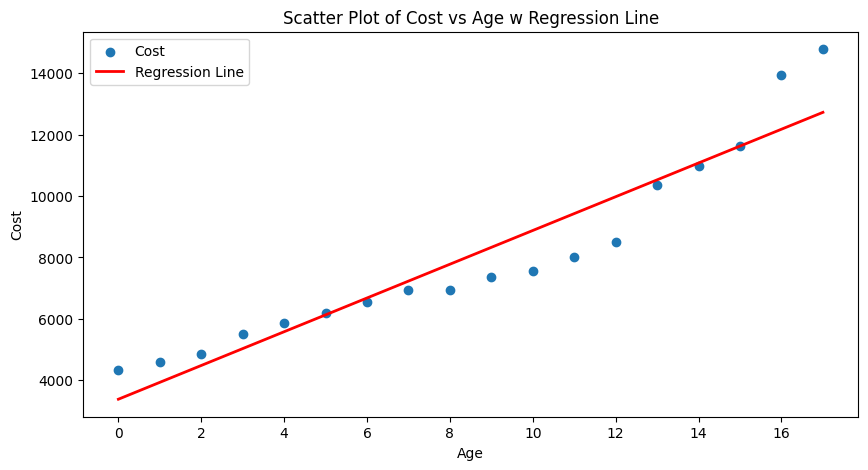

In [151]:
# b) Fit a straight line.
x_age_with_constant = sm.add_constant(x_age)

model_cost = sm.OLS(y_cost, x_age_with_constant).fit()

y_cost_pred = model_cost.predict(x_age_with_constant)

ax = plt.figure(figsize=(10,5)).gca()

plt.scatter(x_age, y_cost, label="Cost")
plt.plot(x_age, y_cost_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Age")
plt.ylabel("Cost")
plt.title("Scatter Plot of Cost vs Age w Regression Line")
plt.legend()

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

In [152]:
# What is the r^2 of the fit?

r2_age = model_cost.rsquared
print(f"R-squared (R²): {r2:.4f}")

R-squared (R²): 0.6069


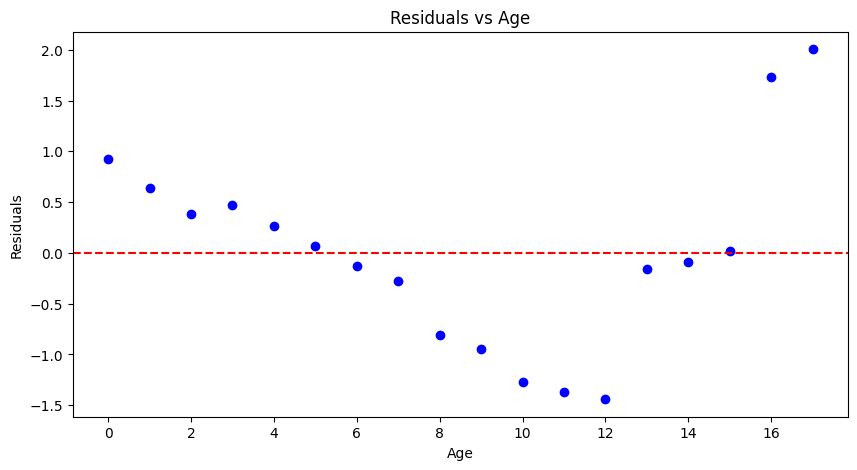

In [153]:
# c) Plot residuals against age. What does the residual plot indicate about the fir?

residuals = model_cost.resid_pearson

ax = plt.figure(figsize=(10,5)).gca()

plt.scatter(x_age, residuals, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.title("Residuals vs Age")

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

# There is a plot of the residuals vs age shows a pattern which indicates that a linear model may not be suitable for the data.

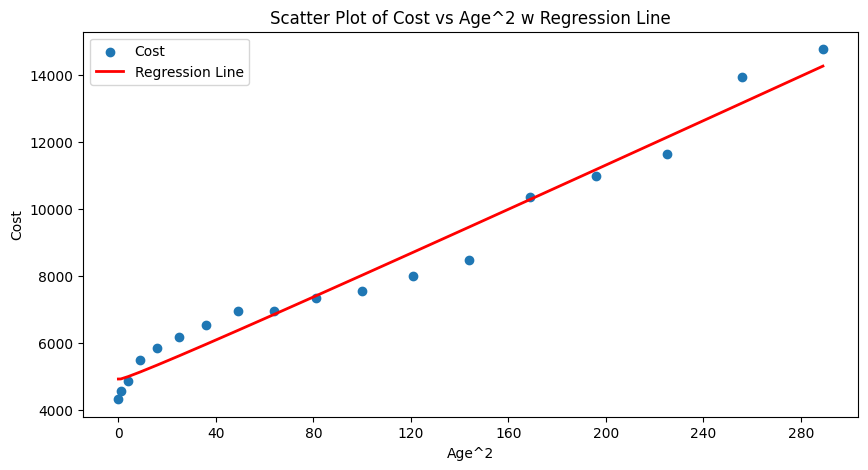

In [154]:
# d) Fit a quadratic model. Compare rsquared for the fit with rsquared for straight line fit.
x_age_squared = np.vectorize(lambda x: x**2)(x_age)
x_age_age_squared = np.array([x_age, x_age_squared]).T
x_age_age_squared_with_constant = sm.add_constant(x_age_age_squared)

model_cost_quadratic = sm.OLS(y_cost, x_age_age_squared_with_constant).fit()

y_cost_quadratic_pred = model_cost_quadratic.predict(x_age_age_squared_with_constant)

ax = plt.figure(figsize=(10,5)).gca()

plt.scatter(x_age_squared, y_cost, label="Cost")
plt.plot(x_age_squared, y_cost_quadratic_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Age^2")
plt.ylabel("Cost")
plt.title("Scatter Plot of Cost vs Age^2 w Regression Line")
plt.legend()

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


In [155]:
# How much additional variation in cost is accounted for by the quadratic term

r2_age_squared = model_cost_quadratic.rsquared
print(f"R-squared (R²): {r2_age_squared:.4f}")

print(f"R-squared (R²) difference: {r2_age_squared - r2_age:.4f}")

# Theres a difference of about 0.07 between the linear and quadratic fits. This indicates that 7% additional variation in cost is accounted for by the quadratic term.

R-squared (R²): 0.9713
R-squared (R²) difference: 0.0742


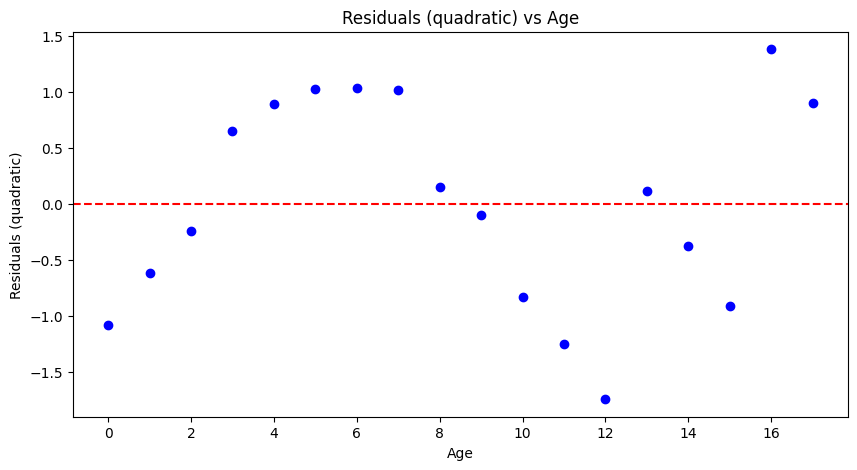

In [156]:
# e) Plot the residuals from the quadratic fit against age. How good is the quadratic fit?

residuals_quadratic = model_cost_quadratic.resid_pearson

ax = plt.figure(figsize=(10,5)).gca()

plt.scatter(x_age, residuals_quadratic, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Age")
plt.ylabel("Residuals (quadratic)")
plt.title("Residuals (quadratic) vs Age")

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

# The quadratic fit is better than the linear fit.

In [157]:
# Are there any outliers?

# There are no residuals greater than 2 or -2.

In [158]:
# Question 44

# Data
x_profit_margin = np.array([6.5,7.0,3.9,4.3,9.8,14.7,13.9,20.3,16.9,15.2,18.7,12.8,8.7,11.9,9.8,8.1,7.3,6.9,9.2])
x_growth_rate = np.array([10,5,5,7,8,12,14,16,11,18,11,10,7,4,19,18,6,6,6])
x_industry = np.array([1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3])
x_p_g_i = np.array([x_profit_margin, x_growth_rate, x_industry]).T
y_pe_ratio = np.array([11.3,10.0,9.9,9.7,10.0,11.9,16.2,21.0,13.3,15.5,18.9,14.6,16.0,8.4,10.4,14.8,10.1,7.0,11.8])

print(x_p_g_i.tolist())

print(x_profit_margin.shape, x_growth_rate.shape, x_industry.shape, y_pe_ratio.shape)

[[6.5, 10.0, 1.0], [7.0, 5.0, 1.0], [3.9, 5.0, 1.0], [4.3, 7.0, 1.0], [9.8, 8.0, 1.0], [14.7, 12.0, 2.0], [13.9, 14.0, 2.0], [20.3, 16.0, 2.0], [16.9, 11.0, 2.0], [15.2, 18.0, 2.0], [18.7, 11.0, 2.0], [12.8, 10.0, 2.0], [8.7, 7.0, 2.0], [11.9, 4.0, 3.0], [9.8, 19.0, 3.0], [8.1, 18.0, 3.0], [7.3, 6.0, 3.0], [6.9, 6.0, 3.0], [9.2, 6.0, 3.0]]
(19,) (19,) (19,) (19,)


In [159]:
def stepwise_selection(x, y, FIN, FOUT):
    selected_indices = []
    remaining_indices = list(range(x.shape[1]))
    features_removed = 0

    while True:
        changed = False

        if len(selected_indices) < x.shape[1]:
            best_f = -1
            best_feature = None

            for index in remaining_indices:
                model = sm.OLS(y, sm.add_constant(x[:, selected_indices + [index]])).fit()
                f_val = model.fvalue

                if f_val > best_f:
                    best_f = f_val
                    best_feature = index

            if best_feature is not None and best_f > FIN:
                selected_indices.append(best_feature)
                remaining_indices.remove(best_feature)
                changed = True

        if len(selected_indices) > 1:
            worst_f = float("inf")
            worst_feature = None

            for index in selected_indices:
                copy = selected_indices.copy()
                copy.remove(index)

                model = sm.OLS(y, sm.add_constant(x[:, copy])).fit()
                f_val = model.fvalue

                if f_val < worst_f:
                    worst_f = f_val
                    worst_feature = index

            if worst_feature is not None and best_f < FOUT:
                selected_indices.remove(worst_feature)
                remaining_indices.append(worst_feature)
                changed = True

        if not changed:
            break

    return selected_indices

In [160]:
# a) Do a stepwise regression with FIN = 2 and FOUT = 2 to find a model to predict the P/E ratio. Which variables are included in the model to predict the ratio?

stepwise_best_features = stepwise_selection(x_p_g_i, y_pe_ratio, 2, 2)
print("Selected feature indices:", stepwise_best_features)

# All the variables are included in the model.

Selected feature indices: [0, 1, 2]


In [161]:
import itertools

def mallows_cp(model, x, y, variance):
    n = len(y)  # Number of observations
    p = 3 # Number of predictors
    rss = np.sum(model.resid ** 2)  # Residual sum of squares
    return (rss / variance) - (n - 2 * p)


def best_subsets_cp(x, y):
    n, p = x.shape
    x_with_constant = sm.add_constant(x)
    var_full = np.var(y - sm.OLS(y, x_with_constant).fit().predict(x_with_constant), ddof=p+1)
    best_cp = float("inf")
    best_subset = None

    for k in range(1, p + 1):
        for subset in itertools.combinations(range(p), k):
            x_subset = x[:, subset]
            model = sm.OLS(y, sm.add_constant(x_subset)).fit()
            cp = mallows_cp(model, x_subset, y, var_full)

            if cp < best_cp:
                best_cp = cp
                best_subset = subset

    return best_subset, best_cp

In [162]:
# b) Perform a best subsets regression with Cp criterion.

best_subsets_features, best_cp_value = best_subsets_cp(x_p_g_i, y_pe_ratio)
print("Best subset of features:", best_subsets_features)
print(f"Lowest Cp value: {best_cp_value: .4f}")

Best subset of features: (0, 1, 2)
Lowest Cp value:  2.0000


In [163]:
# Compare the stepwise results with the best subsets results

def evaluate_model(x, y, feature_indices):
    x_subset = x[:, feature_indices]
    model = sm.OLS(y, sm.add_constant(x_subset)).fit()
    r2 = model.rsquared

    return {"R^2": f"{r2: .4f}"}


stepwise_metrics = evaluate_model(x_p_g_i, y_pe_ratio, stepwise_best_features)
best_subset_metrics = evaluate_model(x_p_g_i, y_pe_ratio, best_subsets_features)


print("Stepwise Regression Metrics:", stepwise_metrics)
print("Best Subsets Regression Metrics:", best_subset_metrics)


# Both selected the same number of features with a similar coefficient of determination indicating a good fit.

Stepwise Regression Metrics: {'R^2': ' 0.6227'}
Best Subsets Regression Metrics: {'R^2': ' 0.6227'}


In [164]:
# Question 46

n = 20
p = 3
constant_included = True # in all models

In [165]:
# a) Fill in the table

import pandas as pd

data = {
    "Variables in Model": ["None", "x1", "x2", "x3", "x1 + x2", "x1 + x3", "x2 + x3", "x1 + x2 + x3"],
    "SSEp": [950,720,630,540,595,425,510,400],
    "p": [1, 2, 2, 2, 3, 3, 3, 4]
}
df = pd.DataFrame(data)
# Calculate Error df
df["Error df"] = n - df["p"] - 1 # residual df

# Calculate MSEp
df["MSEp"] = df["SSEp"] / df["Error df"]

# Calculate SST
df["SST"] = df["MSEp"] * (n - 1)

# Calculate Adj. r^2
df["Adj. r^2"] = 1 - (df["SSEp"] / (df["SST"]) * (n - 1)) / df["Error df"]

# Calculate Cp
mse_full = 400 / (n - 4)
df["Cp"] = (df["SSEp"] / mse_full) - (n - 2 * df["p"])

# Calculate R-squared
df["r^2"] = 1 - (df["SSEp"] / df["SST"])

display(df)

,Variables in Model,SSEp,p,Error df,MSEp,SST,Adj. r^2,Cp,r^2
0,None,950,1,18,52.777778,1002.777778,0.000000e+00,20.0,0.052632
1,x1,720,2,17,42.352941,804.705882,-2.220446e-16,12.8,0.105263
2,x2,630,2,17,37.058824,704.117647,2.220446e-16,9.2,0.105263
3,x3,540,2,17,31.764706,603.529412,0.000000e+00,5.6,0.105263
4,x1 + x2,595,3,16,37.187500,706.562500,0.000000e+00,9.8,0.157895
5,x1 + x3,425,3,16,26.562500,504.687500,0.000000e+00,3.0,0.157895
6,x2 + x3,510,3,16,31.875000,605.625000,0.000000e+00,6.4,0.157895
7,x1 + x2 + x3,400,4,15,26.666667,506.666667,0.000000e+00,4.0,0.210526


In [166]:
# b) Which model would be selected as the best using adjusted r2 criteria and Cp criteria?

best_r2_model = df.loc[df["Adj. r^2"].idxmax(), "Variables in Model"]
best_cp_model = df.loc[df["Cp"].idxmin(), "Variables in Model"]

print("Best model using adjusted r2 criteria:", best_r2_model)
print("Best model using Cp criteria:", best_cp_model)

Best model using adjusted r2 criteria: x2
Best model using Cp criteria: x1 + x3


In [167]:
# Which model would you choose and why?

# I would choose X1 + X3 based on the Cp criterion.

In [168]:
# c) If stepwise regression is done with FIN = 4 and FOUT = 4. Which would be the first variable to enter the model? What is its F-to-enter value?

def get_f_statistic(ssep, msep, p):
    F = ((df["SSEp"][0] - ssep) / (p - 1)) / msep
    F = F.apply(lambda x: 0 if np.isnan(x) else x)
    return F

def get_p_value_from_f_statistic(F, n, p):
    p_value = 1 - stats.f.cdf(F, p, n - p - 1)
    return p_value

# Add F statistic
df["F"] = get_f_statistic(df["SSEp"], df["MSEp"], df["p"])

# Add p-value
df["p-value"] = get_p_value_from_f_statistic(df["F"], n, df["p"])


display(df)


,Variables in Model,SSEp,p,Error df,MSEp,SST,Adj. r^2,Cp,r^2,F,p-value
0,None,950,1,18,52.777778,1002.777778,0.000000e+00,20.0,0.052632,0.000000,1.000000
1,x1,720,2,17,42.352941,804.705882,-2.220446e-16,12.8,0.105263,5.430556,0.015008
2,x2,630,2,17,37.058824,704.117647,2.220446e-16,9.2,0.105263,8.634921,0.002583
3,x3,540,2,17,31.764706,603.529412,0.000000e+00,5.6,0.105263,12.907407,0.000389
4,x1 + x2,595,3,16,37.187500,706.562500,0.000000e+00,9.8,0.157895,4.773109,0.014614
5,x1 + x3,425,3,16,26.562500,504.687500,0.000000e+00,3.0,0.157895,9.882353,0.000631
6,x2 + x3,510,3,16,31.875000,605.625000,0.000000e+00,6.4,0.157895,6.901961,0.003404
7,x1 + x2 + x3,400,4,15,26.666667,506.666667,0.000000e+00,4.0,0.210526,6.875000,0.002372


In [169]:
variables_in_model = []

for index, row in df.iterrows():
    if row["p"] == 2:
        variables_in_model.append(row["F"])

variables_in_model.sort(reverse=True)

def find_predictor(index):
  return variables_in_model[index]

first_f = find_predictor(0)
first_variable_in_model = df.loc[df["F"] == first_f, "Variables in Model"].values[0]


print(f"{first_variable_in_model} has the largest F value > 4. So, it is the first predictor to enter the model with an F value of {first_f: .4f}")

x3 has the largest F value > 4. So, it is the first predictor to enter the model with an F value of  12.9074


In [170]:
# d) What would be the second variable to enter the model? What is its F-to-enter value?


second_f = find_predictor(1)
second_variable_in_model = df.loc[df["F"] == second_f, "Variables in Model"].values[0]


print(f"{second_variable_in_model} has the second largest F value > 4. So, it is the second predictor to enter the model with an F value of {second_f: .4f}")

x2 has the second largest F value > 4. So, it is the second predictor to enter the model with an F value of  8.6349


In [171]:
# What is its partial r^2 with respect to y controlling for the first variable that entered the model?

both_variables_in_model = []

for index, row in df.iterrows():
    if row["p"] == 3 and f"{first_variable_in_model}" in row["Variables in Model"] and f"{second_variable_in_model}"  in row["Variables in Model"]:
        both_variables_in_model.append(row["Variables in Model"])

r2_both = df.loc[df["Variables in Model"] == both_variables_in_model[0], "r^2"].values[0]
r2_first_variable = df.loc[df["Variables in Model"] == first_variable_in_model, "r^2"].values[0]

r2_partial = (r2_both - r2_first_variable) / (1 - r2_first_variable)


print(f"The partial r^2 with respect to y controlling for the first variable that entered the model is {r2_partial: .4f}")


The partial r^2 with respect to y controlling for the first variable that entered the model is  0.0588


In [172]:
# e) Will the first variable entered be removed upon entry of the second variable? Check by doing the partial F-test.

sse_with_both = df.loc[df["Variables in Model"] == both_variables_in_model[0], "SSEp"].values[0]
sse_with_second = df.loc[df["Variables in Model"] == second_variable_in_model, "SSEp"].values[0]

p = df.loc[df["Variables in Model"] == both_variables_in_model[0], "p"].values[0]

F = ((sse_with_second - sse_with_both) / (p - 1 - 1)) / (sse_with_both / (n - p - 1))

p_value = get_p_value_from_f_statistic(F, n, p)

print(f"The p-value of the partial F-test is {p_value: .4f}")

# The p-value from the partial F-test is less than 0.05 implying that first variable is still significant. It will not be removed upon entry of the second variable.


The p-value of the partial F-test is  0.0322


In [173]:
# f) Would stepwise regression enter the third variable in the model i.e. will it choose the full model? Check by doing the partial F-test.

third_f = find_predictor(2)
third_variable_in_model = df.loc[df["F"] == third_f, "Variables in Model"].values[0]

if third_f > 4:
    print(f"{third_variable_in_model} has the third largest F value > 4. So, it is the third predictor to enter the model with an F value of {third_f: .4f}")

    all_variables_in_model = []

    for index, row in df.iterrows():
        if row["p"] == 4:
            all_variables_in_model.append(row["Variables in Model"])

    sse_with_all = df.loc[df["Variables in Model"] == all_variables_in_model[0], "SSEp"].values[0]

    p = df.loc[df["Variables in Model"] == all_variables_in_model[0], "p"].values[0]

    F = ((sse_with_both - sse_with_all) / (p - 1 - 1)) / (sse_with_all / (n - p - 1))

    p_value = get_p_value_from_f_statistic(F, n, p)

    if p_value < 0.05:
        print(f"Stepwise regression will choose the full model with a p-value of {p_value: .4f}")
    else:
        print(f"Stepwise regression will NOT choose the full model with a p-value of {p_value: .4f}")
else:
  print(f"{third_variable_in_model} has an F value <= 4. So, it is NOT the third predictor to enter the model with an F value of {third_f: .4f}")

x1 has the third largest F value > 4. So, it is the third predictor to enter the model with an F value of  5.4306
Stepwise regression will NOT choose the full model with a p-value of  0.1368
